# Day 08. Exercise 05
# Clustering

## 0. Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [5]:
df = pd.read_csv("../data/regression.csv")
df = df.drop(columns=['uid', 'pageviews'])
df.head()

,num_commits,AVG(diff)
0,62,-64.400000
1,20,-74.800000
2,61,-159.000000
3,51,-61.600000
4,5,-5.666667


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [6]:
kmeans = KMeans(random_state=21, n_clusters=3).fit(df)
predicted = kmeans.predict(df)
predicted

array([0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 2, 1, 0, 1, 1], dtype=int32)

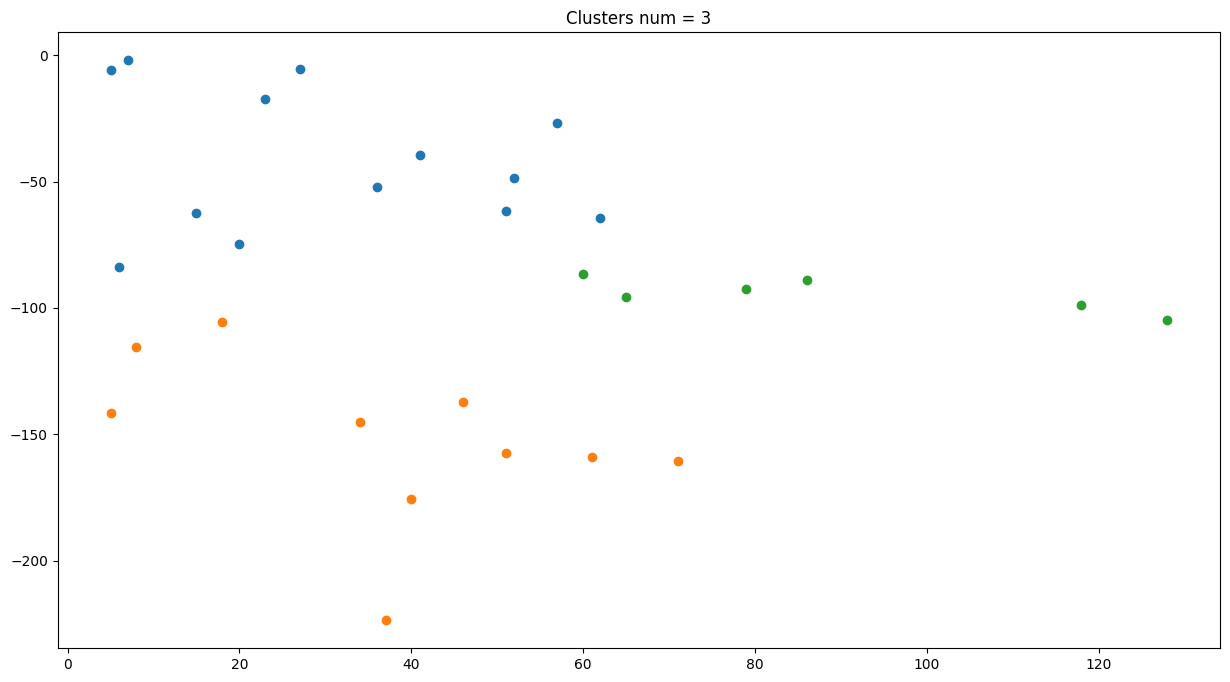

In [7]:
def draw_plot(df, predicted, n_clusters):
    df['predicted'] = predicted
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    plt.title(f"Clusters num = {n_clusters}")
    for uniq in df['predicted'].unique():
        x = df[df['predicted'] == uniq]['num_commits']
        y = df[df['predicted'] == uniq]['AVG(diff)']
        ax.scatter(x, y)
    df.drop(columns=['predicted'], inplace=True)
draw_plot(df, predicted, 3)

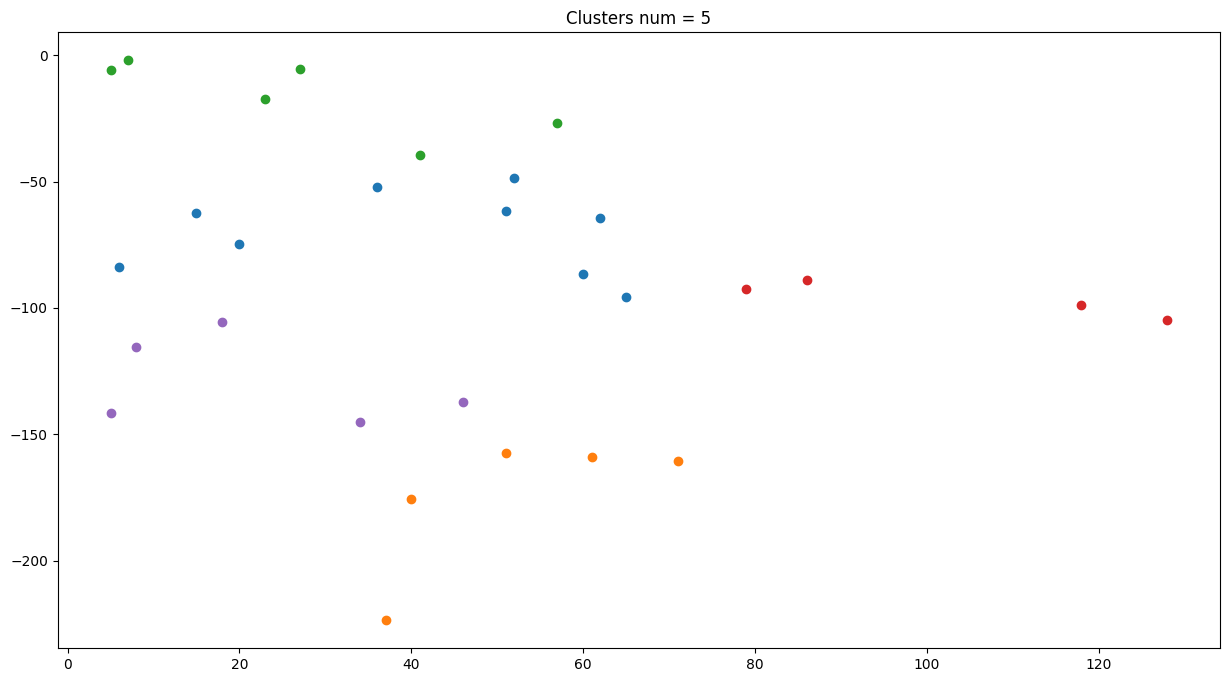

In [8]:
kmeans = KMeans(random_state=21, n_clusters=5).fit(df)
predicted1 = kmeans.predict(df)
draw_plot(df, predicted1, 5)

In [9]:
print(silhouette_score(df, predicted), "num = 3")
print(silhouette_score(df, predicted1), "num = 5")

0.4454402135233297 num = 3
0.3521030626149593 num = 5


## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

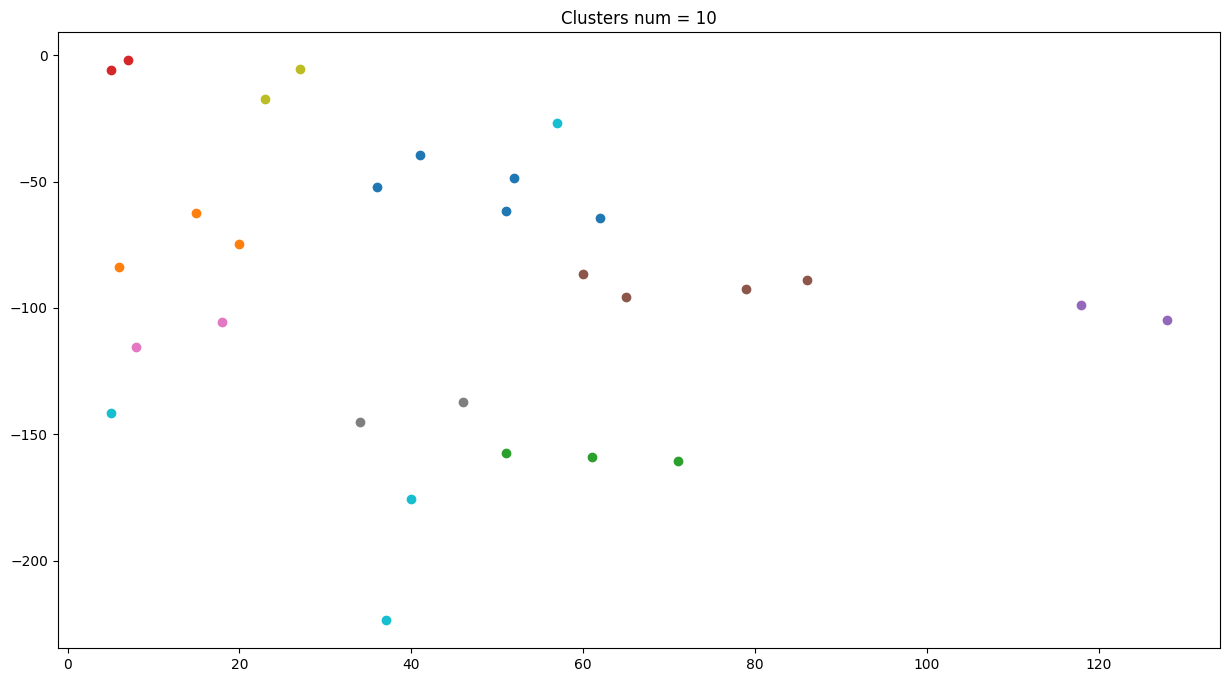

In [10]:
dbscan = DBSCAN(eps=20, min_samples=2).fit(df)
predict = dbscan.labels_
n = len(set(predict))
draw_plot(df, predict, n)

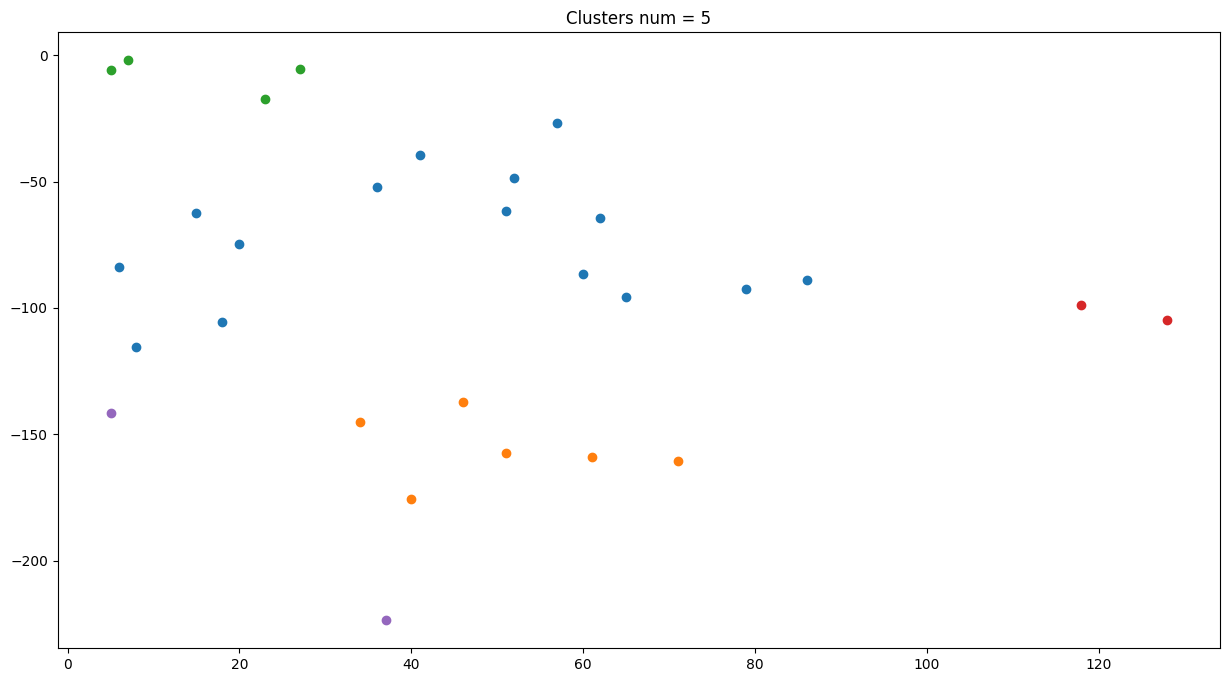

In [11]:
dbscan = DBSCAN(eps=25, min_samples=2).fit(df)
predict1 = dbscan.labels_
n1 = len(set(predict1))
draw_plot(df, predict1, n1)

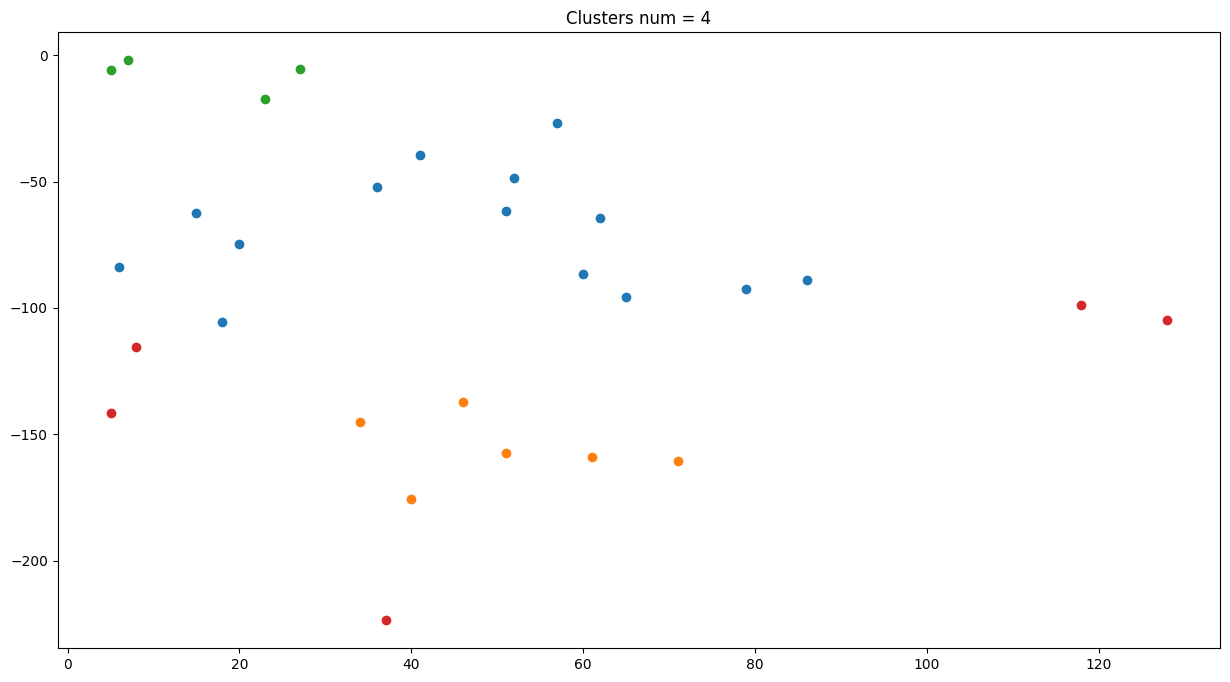

In [12]:
dbscan = DBSCAN(eps=25, min_samples=4).fit(df)
predict2 = dbscan.labels_
n2 = len(set(predict2))
draw_plot(df, predict2, n2)

In [13]:
print(silhouette_score(df, predict), "num =", n)
print(silhouette_score(df, predict1), "num =", n1)
print(silhouette_score(df, predict2), "num =", n2)

0.38339641455696616 num = 10
0.34388947016930727 num = 5
0.32108976907311476 num = 4


## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

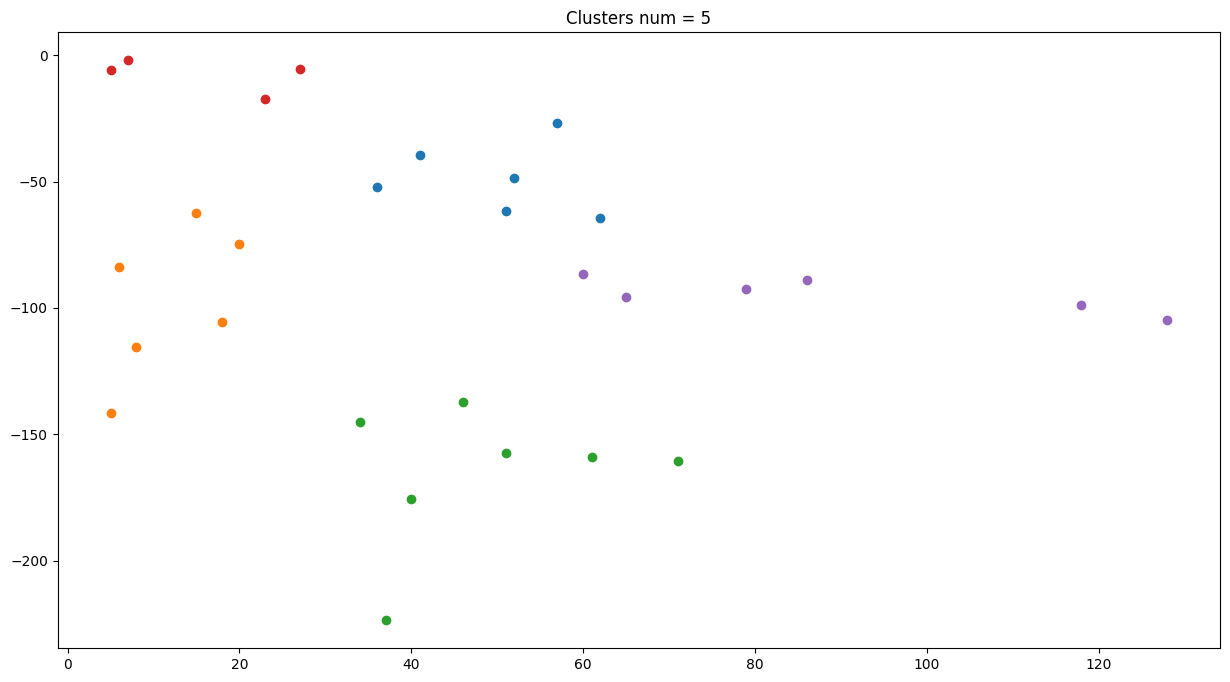

In [14]:
ac = AgglomerativeClustering(n_clusters=5).fit(df)
predict = ac.labels_
draw_plot(df, predict, 5)

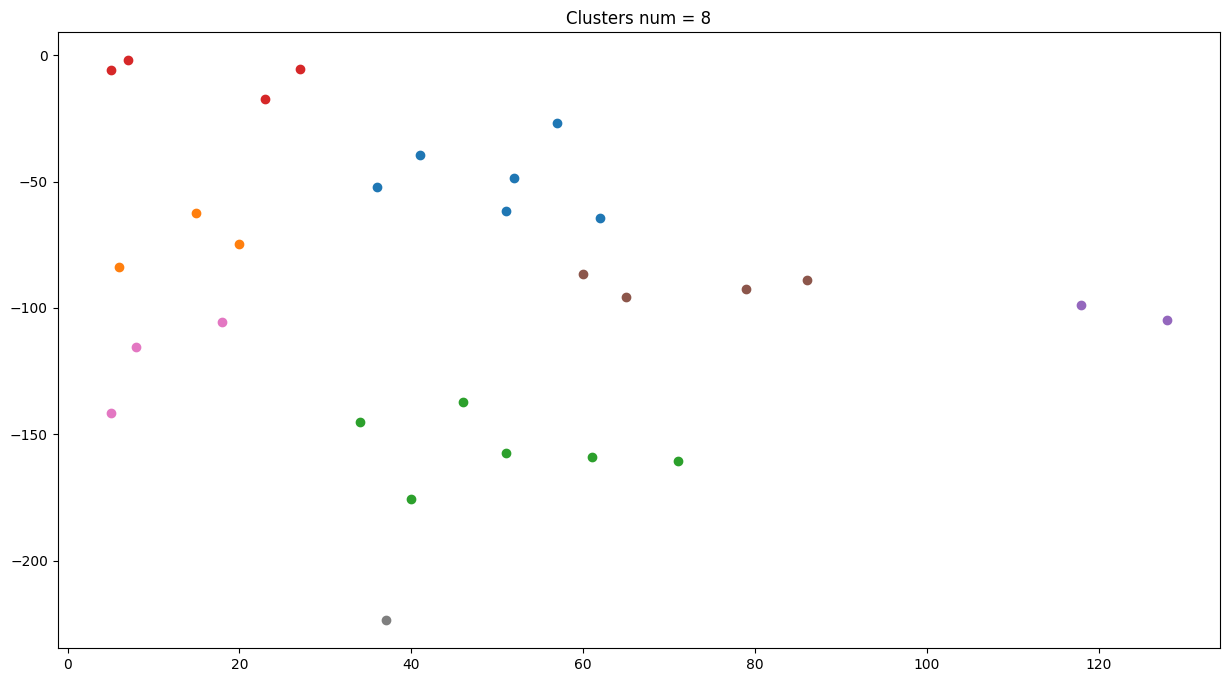

In [15]:
ac = AgglomerativeClustering(n_clusters=8).fit(df)
predict1 = ac.labels_
draw_plot(df, predict1, 8)

In [16]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

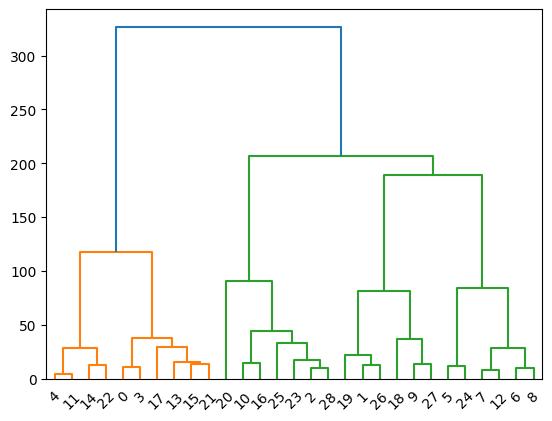

In [17]:
ac = AgglomerativeClustering(n_clusters=5, compute_distances=True).fit(df)
plot_dendrogram(ac)

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [18]:
def serach_best_parametr(df, model_class, name, range_, **kwargs):
    best_score = 0
    best_value = 0
    scores = []
    for value in range_:
        params = kwargs.copy()
        params[name] = value
        model = model_class(**params).fit(df)
        predicted = model.labels_
        score = silhouette_score(df, predicted)
        scores.append(score)
        if best_score <= score:
            best_score = score
            best_value = value

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].plot(range_, scores, marker='o')
    axs[0].set_xlabel = name
    axs[0].set_ylabel = 'silhouette_score'
    axs[0].set_title = 'silhouette_score changes depending on the value of the parameter'


    params[name] = best_value
    model = model_class(**params).fit(df)
    predicted = model.labels_
    df['predicted'] = predicted
    plt.title(f"{name} = {best_value}")
    for uniq in df['predicted'].unique():
        x = df[df['predicted'] == uniq]['num_commits']
        y = df[df['predicted'] == uniq]['AVG(diff)']
        axs[1].scatter(x, y)
    df.drop(columns=['predicted'], inplace=True)
    
    
    print(f"best_score = {best_score}, {name} = {best_value}")

best_score = 0.48638087320227846, n_clusters = 8


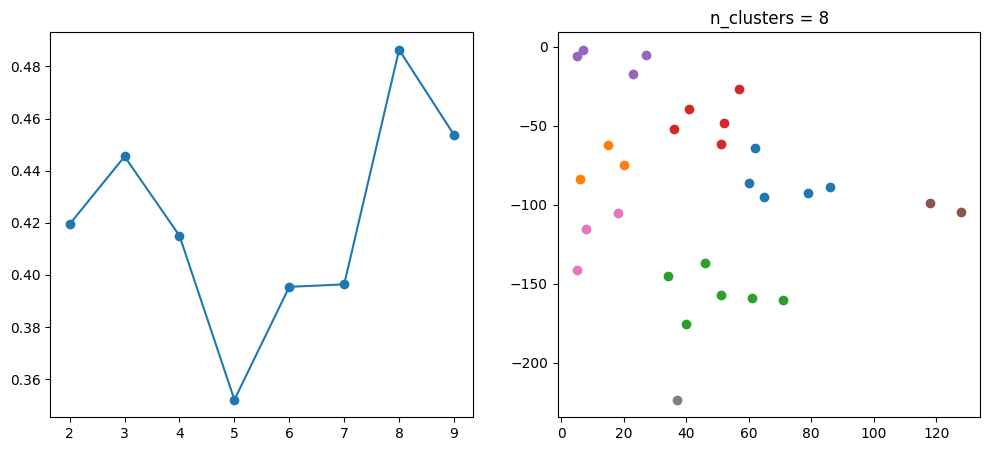

In [19]:
# Kmeans - n_clusters
serach_best_parametr(df, KMeans, 'n_clusters', range(2, 10), random_state = 21)

best_score = 0.4794129092034348, eps = 22


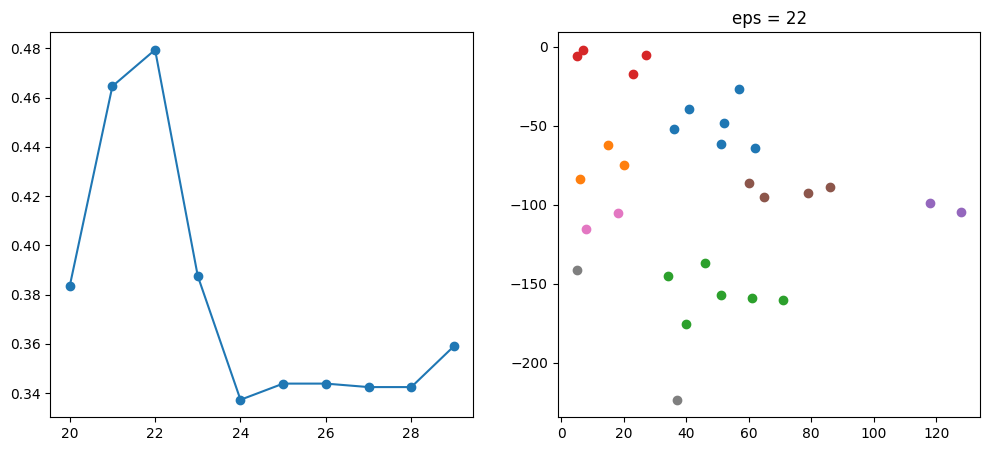

In [20]:
# DBSCAN - n_eps
serach_best_parametr(df, DBSCAN, 'eps', range(20, 30), min_samples=2)

best_score = 0.4322483665424573, min_samples = 1


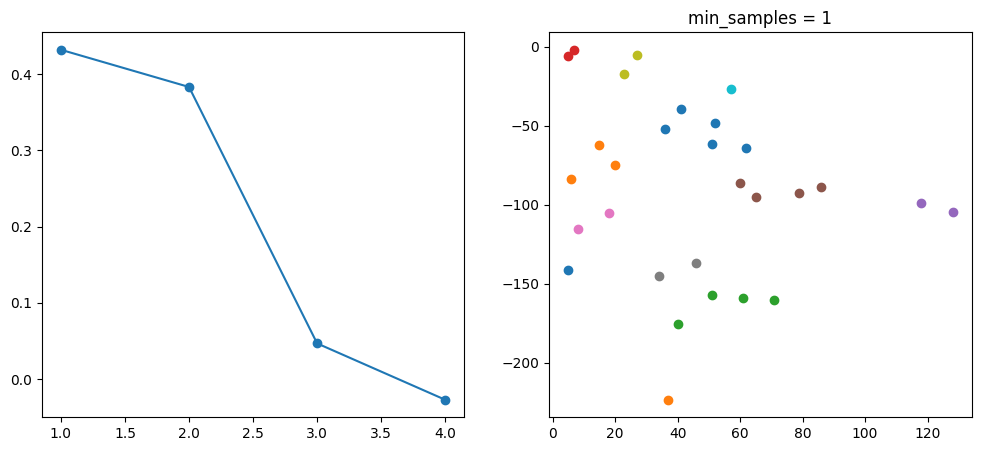

In [21]:
# DBSCAN - n_eps
serach_best_parametr(df, DBSCAN, 'min_samples', range(1, 5), eps=20)

best_score = 0.50779855565622, n_clusters = 8


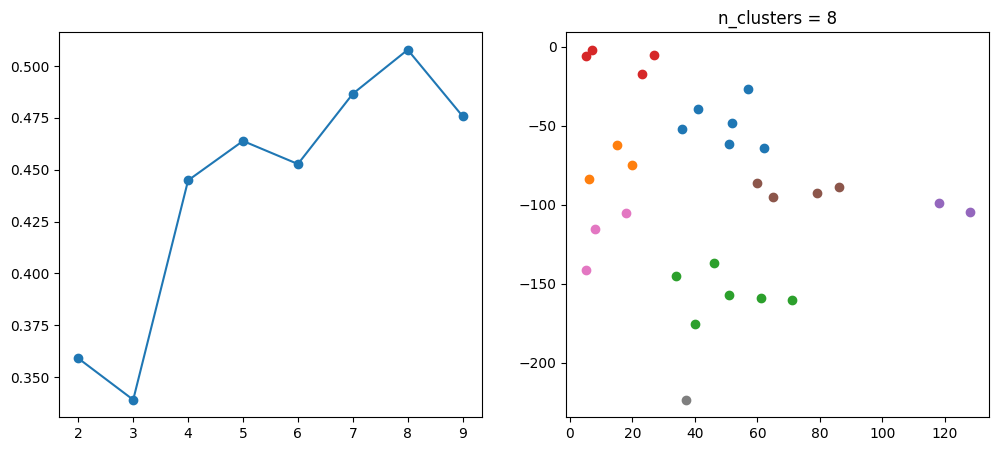

In [22]:
# AgglomerativeClustering - n_clusters
serach_best_parametr(df, AgglomerativeClustering, 'n_clusters', range(2, 10))